# Credit Card Fraud

Using this [credit card fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

$$ \textit{sensitivity}= \textit{recall} = \frac{tp}{tp + fn}$$ (picking all fraudulent transactions)


$$ \textit{precision} = \frac{tp}{tp + fp}$$ labeling as fraudsters only people who are fraudsters (low false positives)


$$ \textit{specificity} = \frac{tn}{tn + fn}$$ (correcly labeling non-fraudulent transactions as non-fraudulent )

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time 
from sklearn import metrics
import random
import plotly.offline as py
import plotly.graph_objs as go
import warnings

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore")

In [0]:
credit_path = 'https://www.dropbox.com/s/wlw3ubszsteo69h/creditcard.csv?dl=1'
df = pd.read_csv(credit_path)
print ("Shape of data: ", df.shape)
display(df.head(5))

Shape of data:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df_norm = (df - df.min()) / (df.max() - df.min())
display(df_norm.head(5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [0]:
df_norm = (df - df.min()) / (df.max() - df.min())

X = df_norm[list(set(list(df_norm.columns)) - set(['Class']))]
Y = df['Class']

In [0]:
df_fraud = df_norm[df_norm['Class'] == 1]
df_non_fraud = df_norm[df_norm['Class'] == 0]
tvals = []
pvals = []

for col in df_norm.columns:
    tval, pval = stats.ttest_ind(df_fraud[col], df_non_fraud[col], equal_var=False)
    tvals.append(tval)
    pvals.append(pval)
    
df_t = pd.DataFrame()
df_t['Column'] = df_norm.columns
df_t['T-value'] = tvals
df_t['P-value'] = pvals

In [0]:
df_eval = pd.DataFrame()
evals = np.zeros(3)

fraud_idx = list(Y[Y == 1].index)
random.shuffle(fraud_idx)

non_fraud_idx = list(set(Y.index) - set(fraud_idx))
random.shuffle(non_fraud_idx)

fraud_train_idx = fraud_idx[:int(0.7 * len(fraud_idx))]
fraud_test_idx = fraud_idx[int(0.7 * len(fraud_idx)):]

non_fraud_train_idx = non_fraud_idx[:int(0.1 * len(non_fraud_idx))]
non_fraud_test_idx = non_fraud_idx[int(0.1 * len(non_fraud_idx)):]

train_idx = fraud_train_idx + non_fraud_train_idx
test_idx = fraud_test_idx + non_fraud_test_idx


X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
Y_train = Y.iloc[train_idx]
Y_test = Y.iloc[test_idx]

In [0]:
def evaluate(model_name, Y_pred):
    cross_tab = pd.crosstab(Y_test, Y_pred)
    
    evals[0] = (cross_tab.iloc[0,0] + cross_tab.iloc[1,1]) / cross_tab.sum().sum()
 
    evals[1] = cross_tab.iloc[1,1] / (cross_tab.iloc[1,0] + cross_tab.iloc[1,1])
 
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    evals[2] = auc
    df_eval[model_name] = evals

In [0]:
start = time.time()
base_pred = np.zeros(len(Y_test) - 1)
base_pred = np.append(base_pred, 1)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Baseline', base_pred)

Runtime 0.00


In [0]:
from sklearn.naive_bayes import BernoulliNB 
start = time.time()
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
bnb_pred = bnb.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Naive Bayes', bnb_pred)

Runtime 0.17


The Naive Bayes model Recall is: 0.0


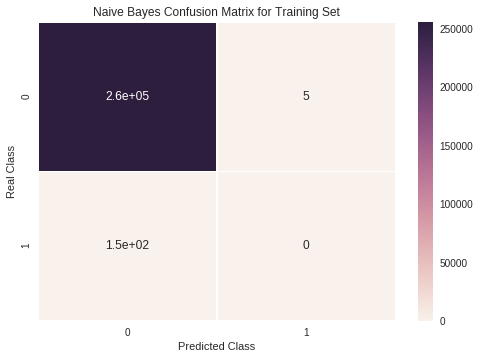

In [0]:
from sklearn.metrics import confusion_matrix

conf_matx_bnb = confusion_matrix(Y_test, bnb_pred)

recall_bnb = conf_matx_bnb[1,1]/(conf_matx_bnb[1,1]+conf_matx_bnb[1,0])

print('The Naive Bayes model Recall is: {}'.format(recall_bnb))

sns.heatmap(conf_matx_bnb,  
            annot=True, 
            linewidths=0.5)
plt.title('Naive Bayes Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', n_jobs = 5)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('KNN',knn_pred)

Runtime 275.47


The KNN model Recall is: 0.8445945945945946


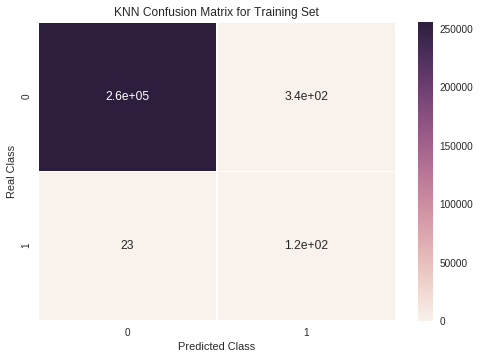

In [0]:
conf_matx_knn = confusion_matrix(Y_test, knn_pred)

recall_knn = conf_matx_knn[1,1]/(conf_matx_knn[1,1]+conf_matx_knn[1,0])

print('The KNN model Recall is: {}'.format(recall_knn))

sns.heatmap(conf_matx_knn,  
            annot=True, 
            linewidths=0.5)
plt.title('KNN Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
from sklearn import ensemble

start = time.time()
rfc = ensemble.RandomForestClassifier(n_jobs = 3)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Random Forest', rfc_pred)

Runtime 1.84


The Random Forest Classifier model Recall is: 0.8445945945945946


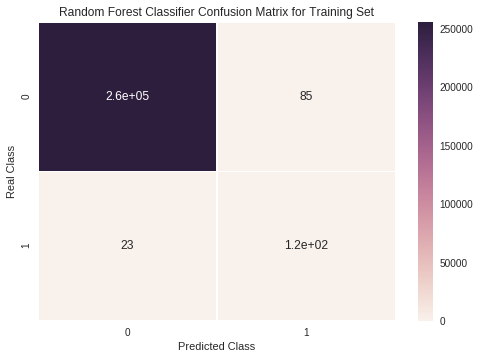

In [0]:
conf_matx_rfc = confusion_matrix(Y_test, rfc_pred)

recall_rfc = conf_matx_rfc[1,1]/(conf_matx_rfc[1,1]+conf_matx_rfc[1,0])

print('The Random Forest Classifier model Recall is: {}'.format(recall_rfc))

sns.heatmap(conf_matx_rfc,  
            annot=True, 
            linewidths=0.5)
plt.title('Random Forest Classifier Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
from sklearn import svm

start = time.time()
svc_model = svm.SVC(C = 100, kernel = 'rbf')
svc_model.fit(X_train, Y_train)
svc_pred = svc_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('SVM', svc_pred)

Runtime 5.15


The Support Vector Classifier model Recall is: 0.831081081081081


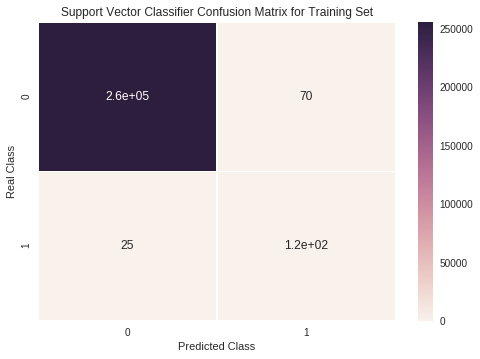

In [0]:
conf_matx_svc = confusion_matrix(Y_test, svc_pred)

recall_svc = conf_matx_svc [1,1]/(conf_matx_svc[1,1]+conf_matx_svc[1,0])
print('The Support Vector Classifier model Recall is: {}'.format(recall_svc))

sns.heatmap(conf_matx_svc,  
            annot=True, 
            linewidths=0.5)
plt.title('Support Vector Classifier Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
from sklearn import linear_model

start = time.time()
ridge_model = linear_model.RidgeClassifier(alpha = 1e-4)
ridge_model.fit(X_train, Y_train)
ridge_pred = ridge_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Ridge Regression', ridge_pred)

Runtime 0.07


The Ridge Classifier model Recall is: 0.5878378378378378


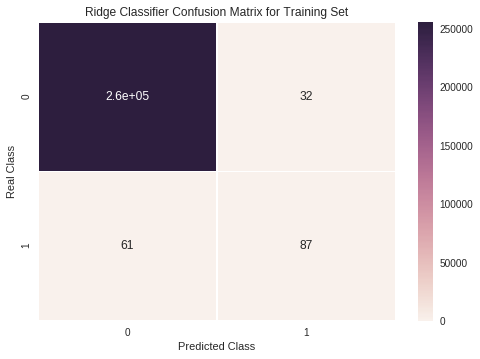

In [0]:
conf_matx_ridge = confusion_matrix(Y_test, ridge_pred)

recall_ridge = conf_matx_ridge[1,1]/(conf_matx_ridge[1,1]+conf_matx_ridge[1,0])
print('The Ridge Classifier model Recall is: {}'.format(recall_ridge))

sns.heatmap(conf_matx_ridge,  
            annot=True, 
            linewidths=0.5)
plt.title('Ridge Classifier Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
start = time.time()
params = {'n_estimators': 1000,
          'max_depth': 2,
          'learning_rate': 0.001,
          'loss': 'deviance'}
gbc = ensemble.GradientBoostingClassifier(**params)
gbc.fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Gradient Boost', gbc_pred)

Runtime 55.84


The Gradient Boosting Classifier model Recall is: 0.8108108108108109


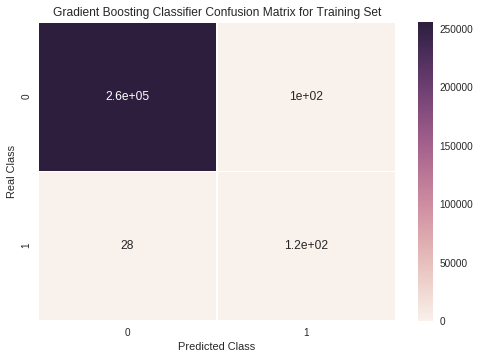

In [0]:
conf_matx_gbc = confusion_matrix(Y_test, gbc_pred)

recall_gbc = conf_matx_gbc[1,1]/(conf_matx_gbc[1,1]+conf_matx_gbc[1,0])
print('The Gradient Boosting Classifier model Recall is: {}'.format(recall_gbc))

sns.heatmap(conf_matx_gbc,  
            annot=True, 
            linewidths=0.5)
plt.title('Gradient Boosting Classifier Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
start = time.time()
logreg_model = linear_model.LogisticRegression(penalty = 'l2', C=1e9)
logreg_model.fit(X_train, Y_train)
logreg_pred = logreg_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Logistic Regression', logreg_pred)



Runtime 1.08


The Logistic Regression Recall is: 0.8378378378378378


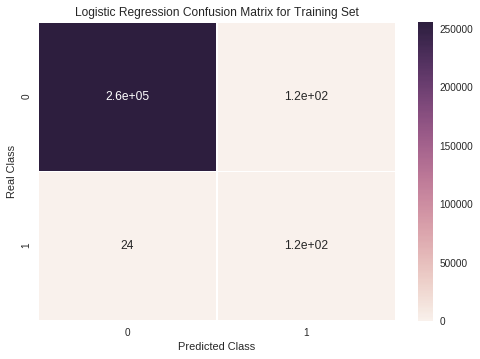

In [0]:
conf_matx_logreg = confusion_matrix(Y_test, logreg_pred)

recall_logreg = conf_matx_logreg[1,1]/(conf_matx_logreg[1,1]+conf_matx_logreg[1,0])

print('The Logistic Regression Recall is: {}'.format(recall_logreg))

sns.heatmap(conf_matx_logreg,  
            annot=True, 
            linewidths=0.5)
plt.title('Logistic Regression Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
start = time.time()
lasso_model = linear_model.LogisticRegression(penalty = 'l1')
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Lasso Regression', lasso_pred)

Runtime 5.59


The Lasso Regressin model Recall is: 0.8108108108108109


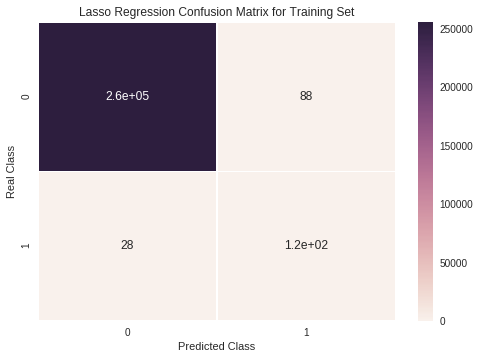

In [0]:
conf_matx_lasso = confusion_matrix(Y_test, lasso_pred)

recall_lasso = conf_matx_lasso [1,1]/(conf_matx_lasso[1,1]+conf_matx_lasso[1,0])
print('The Lasso Regressin model Recall is: {}'.format(recall_lasso))

sns.heatmap(conf_matx_lasso,  
            annot=True, 
            linewidths=0.5)
plt.title('Lasso Regression Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [0]:
df_eval.rename(index={0: 'Accuracy', 
                      1: 'AUC Score', 
                      2: 'Recall'
                     }, inplace = True)

from sklearn.model_selection import cross_val_score

print('Naive Bayes cross validation score: ', cross_val_score(bnb, X_train, Y_train, cv=5))
print('KNN Cross validation score: ', cross_val_score(knn_model, X_train, Y_train, cv=5))
print('Random Forest Classification cross validation score: ', cross_val_score(rfc, X_train, Y_train, cv=5))
print('SVC cross validation score: ', cross_val_score(svc_model, X_train, Y_train, cv=5))
print('Ridge Classifier cross validation score: ', cross_val_score(ridge_model, X_train, Y_train, cv=5))
print('Gradient Boost Classifier cross validation score: ', cross_val_score(gbc, X_train, Y_train, cv=5))
print('Logistic Regression cross validation score: ', cross_val_score(logreg_model, X_train, Y_train, cv=5))
print('Lasso Regression cross validation score: ', cross_val_score(lasso_model, X_train, Y_train, cv=5))

Naive Bayes cross validation score:  [0.98801251 0.98818419 0.98818419 0.98801043 0.98818213]
KNN Cross validation score:  [0.99583044 0.99617724 0.99565595 0.99652476 0.99530761]
Random Forest Classification cross validation score:  [0.99704656 0.99739357 0.99721981 0.99739357 0.99739312]
SVC cross validation score:  [0.99722029 0.99774109 0.99669852 0.99739357 0.99635036]
Ridge Classifier cross validation score:  [0.99409312 0.99391833 0.99374457 0.99374457 0.99530761]
Gradient Boost Classifier cross validation score:  [0.99687283 0.99739357 0.99617724 0.99687228 0.99669795]
Logistic Regression cross validation score:  [0.99652536 0.99739357 0.99669852 0.99652476 0.99652416]
Lasso Regression cross validation score:  [0.99565671 0.99721981 0.99600348 0.99548219 0.99617657]


In [0]:
from sklearn.metrics import f1_score

print('F1 score for Baseline: {}'. format(f1_score(Y_test, base_pred)))
print('F1 score for Naives Bayes: {}'. format(f1_score(Y_test, bnb_pred)))
print('F1 score for KNN: {}'. format(f1_score(Y_test, knn_pred)))
print('F1 score for Random Forest Classification: {}'. format(f1_score(Y_test, rfc_pred)))
print('F1 score for SVC Classification: {}'. format(f1_score(Y_test, svc_pred)))
print('F1 score for Ridge Classifier: {}'.format(f1_score(Y_test, ridge_pred)))
print('F1 score for Gradient Boost: {}'. format(f1_score(Y_test, gbc_pred)))
print('F1 score for Logistic Regression: {}'.format(f1_score(Y_test, logreg_pred)))
print('F1 score for Lasso Regression: {}'.format(f1_score(Y_test, lasso_pred)))

F1 score for Baseline: 0.0
F1 score for Naives Bayes: 0.0
F1 score for KNN: 0.4084967320261438
F1 score for Random Forest Classification: 0.6983240223463688
F1 score for SVC Classification: 0.721407624633431
F1 score for Ridge Classifier: 0.6516853932584269
F1 score for Gradient Boost: 0.6486486486486487
F1 score for Logistic Regression: 0.6408268733850129
F1 score for Lasso Regression: 0.6741573033707865
